# 2.其他批次效应去除方法

使用scib环境

In [2]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import scanpy as sc
from velovgi.preprocessing import latentvelo_preprocess, review_preprocess # 这个包只能单独提出来，或者出错的话，多次导入几次

## 1. 数据读入

In [5]:
adata_filename = "/home/huang/PyCode/scRNA/data/Gastrulation/erythroid_lineage.h5ad" # 实验室服务器的数据路径

adata = sc.read(adata_filename)
batch_key = "stage"
cluster_key = "celltype"
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [6]:
adata_bak = adata.copy()

## 2. 批次效应去除

In [7]:
epochs = 50

In [8]:
adata = adata_bak.copy()
review_save_dir = "./data/erythroid_lineage_review.h5ad"
review_preprocess(adata, batch_key=batch_key, cluster_key=cluster_key, epochs=epochs, save=review_save_dir)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 41/50:  82%|████████▏ | 41/50 [03:43<00:49,  5.46s/it, loss=9.75e+03, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 17708.279. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/huang/.conda/envs/scib/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 27/50:  54%|█████▍    | 27/50 [02:15<01:55,  5.01s/it, loss=80.8, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 632.856. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/huang/.conda/envs/scib/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


computing neighbors
    finished (0:00:14) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [9]:
adata = adata_bak.copy()
latentvelo_save_dir = "./data/erythroid_lineage_latentvelo.h5ad"
latentvelo_preprocess(adata, batch_key=batch_key, cluster_key=cluster_key, epochs=epochs, save=latentvelo_save_dir)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 44/50:  88%|████████▊ | 44/50 [48:13<06:34, 65.77s/it, loss=9.84e+03, v_num=1]   
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 17333.973. Signaling Trainer to stop.
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/huang/.conda/envs/scib/lib/python3.8/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


AnnData object with n_obs × n_vars = 9815 × 2000
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

## 3. 速率图可视化对比

In [1]:
import sys
sys.path = ["../../.."] + sys.path # 切换到项目目录下

import scvelo as scv
import velovgi

Global seed set to 0
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
review_save_dir = "./data/erythroid_lineage_review.h5ad"
latentvelo_save_dir = "./data/erythroid_lineage_latentvelo.h5ad"

batch_key = "stage"
cluster_key = "celltype"

adata_review = scv.read(review_save_dir)
adata_latentvelo = scv.read(latentvelo_save_dir)
adata_velovgi = velovgi.tl.read_adata("./data/adata/")

scv.tl.velocity(adata_review)
scv.tl.velocity_graph(adata_review)

scv.tl.velocity(adata_latentvelo)
scv.tl.velocity_graph(adata_latentvelo)

load ./data/adata//adata.h5ad
load ./data/adata//sample_recover.pkl
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


<AxesSubplot: title={'center': 'velovgi'}>

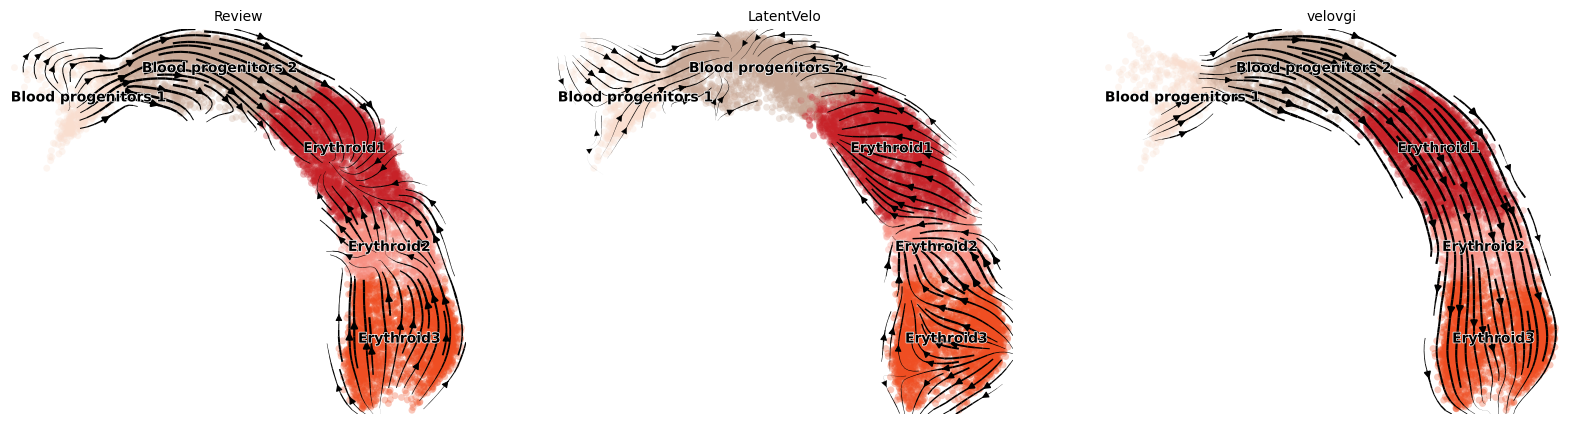

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,5))

scv.pl.velocity_embedding_stream(adata_review, color=cluster_key, title="Review", ax=ax[0], show=False)
scv.pl.velocity_embedding_stream(adata_latentvelo, color=cluster_key, title="LatentVelo", ax=ax[1], show=False)
scv.pl.velocity_embedding_stream(adata_velovgi, color=cluster_key, title="velovgi", ax=ax[2], show=False)

## 4. 指标对比

In [4]:
cluster_edges = [
    ("Blood progenitors 1", "Blood progenitors 2"), 
    ("Blood progenitors 2", "Erythroid1"), 
    ("Erythroid1", "Erythroid2"), 
    ("Erythroid2", "Erythroid3")
    ] # 已知的细胞类型间的分化信息

name_list = ["review","latentvelo","velovgi"]
adata_list = [adata_review, adata_latentvelo, adata_velovgi]

df= velovgi.tl.get_metric_total_df(name_list, adata_list, cluster_edges, cluster_key) # 指标计算
df

,CBDir,Metric,Score,ICVCoh,Model
0,0.995145,CBDir,0.995145,NaN,review
1,0.998794,CBDir,0.998794,NaN,review
2,0.944063,CBDir,0.944063,NaN,review
3,-0.987010,CBDir,-0.987010,NaN,review
4,0.993783,CBDir,0.993783,NaN,review
...,...,...,...,...,...
9810,NaN,ICVCoh,0.961473,0.961473,velovgi
9811,NaN,ICVCoh,0.955043,0.955043,velovgi
9812,NaN,ICVCoh,0.969590,0.969590,velovgi
9813,NaN,ICVCoh,0.982866,0.982866,velovgi


<AxesSubplot: xlabel='Metric', ylabel='Score'>

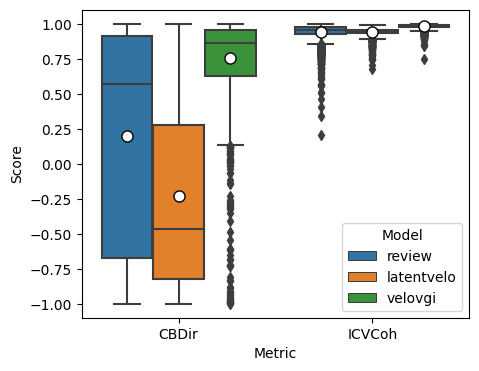

In [5]:
import seaborn as sns
figure, ax = plt.subplots(1, 1, figsize=(5,4))

x = "Metric"
y = "Score"
orient = "v"

sns.boxplot(
    df,
    orient=orient, x=x, y=y, hue="Model",
    showmeans=True,
    meanprops={"marker":"o",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"8"})
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1, 0.5)) # 移动图例